# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[8, 1, 7, 4],
         [4, 2, 6, 2],
         [2, 5, 5, 3]],
 
        [[3, 2, 6, 1],
         [2, 7, 4, 4],
         [8, 9, 2, 7]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
## Arithmetic in arrays is element wise

In [5]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [6]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[16, 48,  6, 75],
       [ 3, 18, 39, 88],
       [23,  9,  1, 82],
       [20, 31, 34,  1]])

In [14]:
# Guess the output
print(b[2,3])
print(b[0,0])


82
16


In [15]:
b[0:3,1],b[:,1]

(array([48, 18,  9]), array([48, 18,  9, 31]))

In [16]:
b[1:3,:]

array([[ 3, 18, 39, 88],
       [23,  9,  1, 82]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [23]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592
2014-01-06,-0.509282,-0.609419,0.233200,0.082866


In [24]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [25]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [26]:
df.head()

,A,B,C,D
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592


In [27]:
df.tail()

,A,B,C,D
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592
2014-01-06,-0.509282,-0.609419,0.233200,0.082866


In [28]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.077375,-0.015007,0.011499,0.000203
std,0.847026,0.698170,1.127369,0.846952
min,-1.327866,-0.719615,-1.385478,-1.171592
25%,-0.403814,-0.597670,-0.848166,-0.539579
50%,-0.002226,-0.109357,0.058129,0.121244
75%,0.113803,0.511162,0.719173,0.422019
max,1.253265,0.890728,1.548959,1.167899


In [30]:
df.sort_values(by='B')
df

,A,B,C,D
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592
2014-01-06,-0.509282,-0.609419,0.233200,0.082866


### Selection

In [31]:
df[['A','B']]

,A,B
2014-01-01,-0.087409,-0.719615
2014-01-02,1.253265,0.343710
2014-01-03,0.082957,0.890728
2014-01-04,0.124084,0.566979
2014-01-05,-1.327866,-0.562423
2014-01-06,-0.509282,-0.609419


In [32]:
df[0:3]

,A,B,C,D
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485


In [33]:
# By label
df.loc[dates[0]]

A   -0.087409
B   -0.719615
C   -0.116941
D    0.159623
Name: 2014-01-01 00:00:00, dtype: float64

In [34]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,-0.087409,-0.719615
2014-01-02,1.253265,0.343710
2014-01-03,0.082957,0.890728
2014-01-04,0.124084,0.566979
2014-01-05,-1.327866,-0.562423
2014-01-06,-0.509282,-0.609419


In [35]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.343710
2014-01-03,0.890728
2014-01-04,0.566979


In [36]:
# Fast access to scalar
df.at[dates[1],'B']

0.34371007274249571

In [37]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592
2014-01-06,-0.509282,-0.609419,0.233200,0.082866


### Boolean Indexing

In [38]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592
2014-01-06,-0.509282,-0.609419,0.233200,0.082866


### Setting

In [40]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [41]:
df_posA

,A,B,C,D
2014-01-01,0.087409,0.719615,0.116941,-0.159623
2014-01-02,1.253265,0.343710,-1.385478,1.167899
2014-01-03,0.082957,0.890728,-1.091908,0.509485
2014-01-04,0.124084,0.566979,0.881164,-0.747061
2014-01-05,1.327866,0.562423,-1.548959,1.171592
2014-01-06,0.509282,0.609419,-0.233200,-0.082866


In [42]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [43]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

In [45]:
df

,A,B,C,D,F
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623,NaN
2014-01-02,1.253265,0.343710,-1.385478,1.167899,1.0
2014-01-03,0.082957,0.890728,-1.091908,0.509485,2.0
2014-01-04,0.124084,0.566979,0.881164,-0.747061,3.0
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592,4.0
2014-01-06,-0.509282,-0.609419,0.233200,0.082866,5.0


### Missing Data

In [46]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [47]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [48]:
df1

,A,B,C,D,F,E
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623,NaN,1.0
2014-01-02,1.253265,0.343710,-1.385478,1.167899,1.0,1.0
2014-01-03,0.082957,0.890728,-1.091908,0.509485,2.0,NaN
2014-01-04,0.124084,0.566979,0.881164,-0.747061,3.0,NaN


In [49]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [50]:
df.describe()

/Users/fpombeiro/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,-0.077375,-0.015007,0.011499,0.000203,3.000000
std,0.847026,0.698170,1.127369,0.846952,1.581139
min,-1.327866,-0.719615,-1.385478,-1.171592,1.000000
25%,-0.403814,-0.597670,-0.848166,-0.539579,NaN
50%,-0.002226,-0.109357,0.058129,0.121244,NaN
75%,0.113803,0.511162,0.719173,0.422019,NaN
max,1.253265,0.890728,1.548959,1.167899,5.000000


In [51]:
df.mean(),df.mean(1) # Operation on two different axes

(A   -0.077375
 B   -0.015007
 C    0.011499
 D    0.000203
 F    3.000000
 dtype: float64, 2014-01-01   -0.191086
 2014-01-02    0.475879
 2014-01-03    0.478252
 2014-01-04    0.765033
 2014-01-05    0.497415
 2014-01-06    0.839473
 Freq: D, dtype: float64)

### Applying functions

In [53]:
df

,A,B,C,D,F
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623,NaN
2014-01-02,1.253265,0.343710,-1.385478,1.167899,1.0
2014-01-03,0.082957,0.890728,-1.091908,0.509485,2.0
2014-01-04,0.124084,0.566979,0.881164,-0.747061,3.0
2014-01-05,-1.327866,-0.562423,1.548959,-1.171592,4.0
2014-01-06,-0.509282,-0.609419,0.233200,0.082866,5.0


In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.087409,-0.719615,-0.116941,0.159623,NaN
2014-01-02,1.165856,-0.375905,-1.502420,1.327522,1.0
2014-01-03,1.248813,0.514823,-2.594328,1.837006,3.0
2014-01-04,1.372898,1.081802,-1.713163,1.089945,6.0
2014-01-05,0.045031,0.519379,-0.164204,-0.081647,10.0
2014-01-06,-0.464251,-0.090041,0.068995,0.001219,15.0


In [54]:
df.apply(lambda x: x.max() - x.min())

A    2.581131
B    1.610343
C    2.934437
D    2.339491
F    4.000000
dtype: float64

In [55]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [ ]:
np.random.randn(10,4)

In [ ]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

In [ ]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

In [ ]:
pd.concat(pieces)

In [ ]:
# Also can "Join" and "Append"
df

### Grouping


In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [ ]:
df

In [ ]:
df.groupby(['A','B']).sum()

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [ ]:
a = df.groupby(['A','B']).sum()

In [ ]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

### Time Series


In [3]:
import pandas as pd
import numpy as np

In [4]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [5]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [6]:
ts

2014-01-01 00:00:00    380
2014-01-01 00:00:01    395
2014-01-01 00:00:02    120
2014-01-01 00:00:03    317
2014-01-01 00:00:04    229
2014-01-01 00:00:05    406
2014-01-01 00:00:06    250
2014-01-01 00:00:07    373
2014-01-01 00:00:08    340
2014-01-01 00:00:09    184
2014-01-01 00:00:10    310
2014-01-01 00:00:11    130
2014-01-01 00:00:12    352
2014-01-01 00:00:13     34
2014-01-01 00:00:14      1
2014-01-01 00:00:15    261
2014-01-01 00:00:16    474
2014-01-01 00:00:17    387
2014-01-01 00:00:18    338
2014-01-01 00:00:19    206
2014-01-01 00:00:20    237
2014-01-01 00:00:21    349
2014-01-01 00:00:22    188
2014-01-01 00:00:23    167
2014-01-01 00:00:24    422
2014-01-01 00:00:25    237
2014-01-01 00:00:26    462
2014-01-01 00:00:27    120
2014-01-01 00:00:28    129
2014-01-01 00:00:29    415
                      ... 
2014-01-01 00:01:10    473
2014-01-01 00:01:11    345
2014-01-01 00:01:12     63
2014-01-01 00:01:13    149
2014-01-01 00:01:14    156
2014-01-01 00:01:15    137
2

In [7]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    256.333333
2014-01-01 00:01:00    254.225000
Freq: T, dtype: float64

In [8]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-8-5c9240a56f62>, line 2)

### Plotting


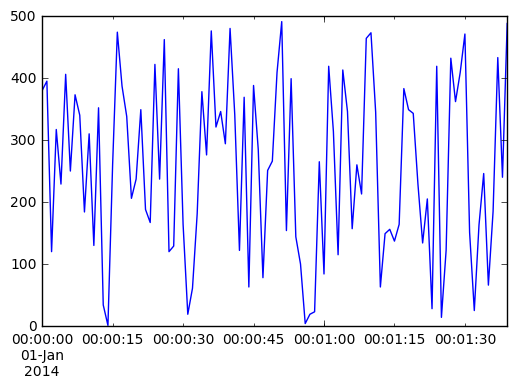

In [12]:
%matplotlib inline  
ts.plot()

In [11]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [ ]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas